# Simulated Annealing LAB Report


In [273]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

## Ex. 1: Writing the fitnessFunction

In [274]:
def fitnessFunction(x):
    """ Function to minimize."""
    m = 1+ np.cos(0.04*x)**2
    n = np.exp(-x**2/20000)
    result = -(m*n) #result has to change signs due to maximization problem
    return result


## Ex. 2: Displaying the fitness surface

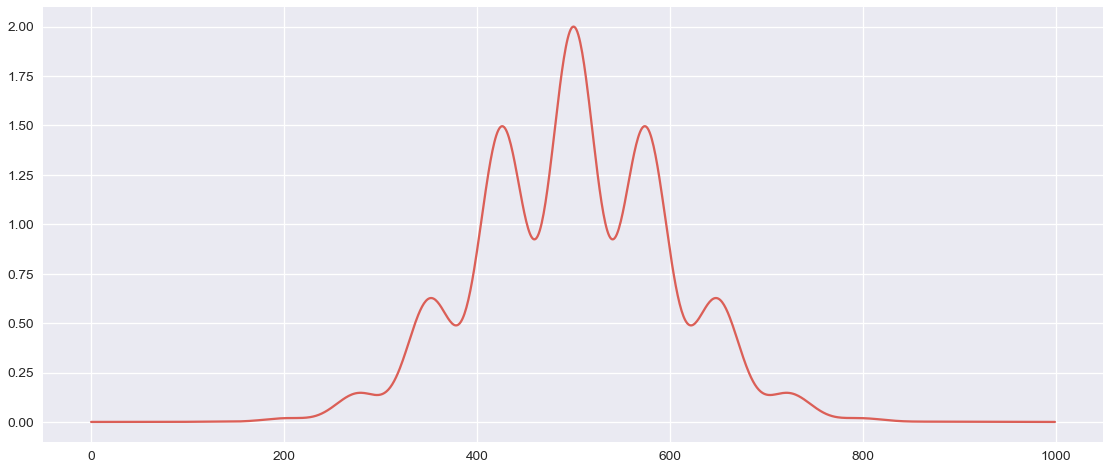

In [275]:
plt.plot(-fitnessFunction(np.array(range(-500,500))))
plt.show()

## Ex. 3: Running the simulated annealing algortihm

#### 1) sub_functions

In [276]:
interval = (-500,500)

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

def cost_function(x):
    return fitnessFunction(x)

def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (500 - (-500)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p


#### 2) Simulated Annealing Function

In [277]:
def sim_ann(state, cost_function, random_neighbour, acceptance, T):
    
    Tmin = 0.01
    cost = cost_function(state)
    states, costs = [state], [cost]
    steps = 0
    while T > Tmin:
        T = T*0.99
        new_state = random_neighbour(state, 1)
        new_cost = cost_function(new_state)
        
        if acceptance_probability(cost,new_cost,T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            steps += 1
    return state, cost_function(state), states, costs, steps   

#### 3) Running the Algorithm

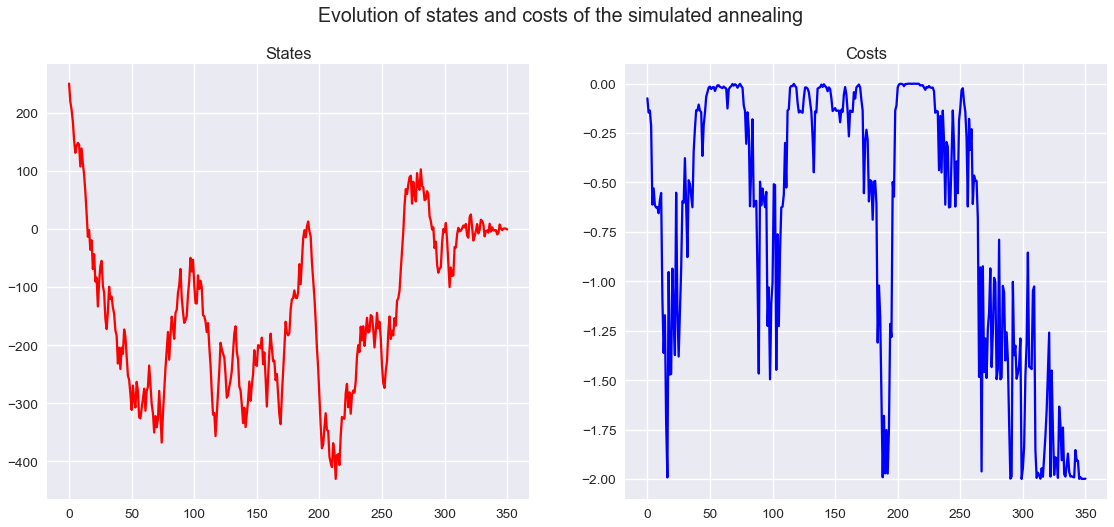

In [278]:
state = 250
T = 10
state, c, states, costs, steps = sim_ann(state,cost_function, random_neighbour, acceptance_probability, T)

def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()
    
see_annealing(states, costs)

#### 4) Slowly increasing the Temperature

In [279]:
counter = 0
result = 0
T = 10
iteration = 0

while result < 0.9:
    T += 1
    iteration += 1
    state, c, states, costs, steps = sim_ann(state,cost_function, random_neighbour, acceptance_probability, T)
    if state < 0.01:
        counter +=1
    result = (counter/iteration)*100

print("Final Temperature: " + str(T))

Final Temperature: 12


## Ex. 4: Plotting intermediate best fitnesses vs. iteration number

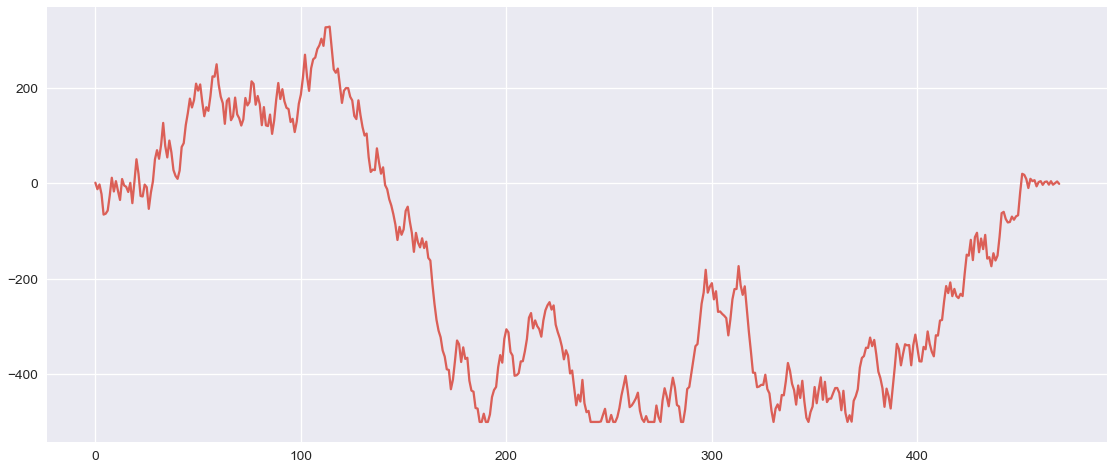

In [280]:
plt.plot(list(range(steps+1)),states)
plt.show()